**Data Analysis Using Naive Bayes Classifier: Classifying Toxic Comments**
===========

**Abstract:** Classifying offensive, toxic, and obscene comments using machine learning and data analysis, with Naive Bayes classification.

Language: Python

Models used: Naive Bayes Classification

Dependent Variable: 'y': This is the dependent variable. It contains the classes you are trying to predict. In your case, 'y' takes on the values 0 for non-offensive comments and 1 for offensive comments.

Explanatory variables:The comments in text are converted into numerical data, and the classification of comments includes the categories 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', and 'identity_hate'.

Data sources: 

Toxic Comment Classification Challenge: <https://www.kaggle.com/datasets/julian3833/jigsaw-toxic-comment-classification-challenge>

***

### **Data analysis and machine learning**


'**Data analysis** is a practice that focuses on the application of statistical methods, data mining techniques, machine learning, and analytical tools to extract insights, patterns, and valuable knowledge from datasets. It involves data collection, cleaning, transformation, and interpretation with the aim of making informed decisions, making predictions, optimizing processes, and solving complex problems. The science of data analysis plays a fundamental role in fields such as data science, business intelligence, scientific research, medicine, marketing, finance, and more, helping to transform raw data into actionable information to drive progress and innovation.

**Machine Learning** is the science of enabling computers to learn how to perform tasks without being explicitly programmed to do so. It focuses on generating accurate predictions, minimizing mean squared error, even in the face of computational constraints. Machine learning models deal with a trade-off between bias and variance and often use regularization techniques for biased parameter estimates.

Data analysis and machine learning are interconnected in the knowledge extraction from data. Data analysis forms the foundation, involving data exploration, preparation, and understanding. Machine learning uses this data to train models that can predict, classify, or automate tasks. **Data analysis provides initial insights, while machine learning leverages these insights to create intelligent systems that make decisions or predictions based on the data.**

### **Importing the libraries and extracting the data.**

In [29]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv(r'C:\Users\lucas\Downloads\2023.1\Intro Data Science\EE1\EE1 - Naive Bayes\train.csv')
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


***Scikit-learn*** offers a wide range of machine learning algorithms, data preprocessing tools, and model evaluation metrics. Efficient data structures for working with arrays and tensors are provided by ***NumPy***, rendering it indispensable for mathematical and numerical operations. Data structures like DataFrames are made available by ***Pandas***, facilitating the reading, manipulation, and analysis of datasets. **Matplotlib.pyplot** serves as a data visualization library in Python. Complex statistical graphics creation is simplified by ***Seaborn***. ***Sklearn.model_selection***, a component of scikit-learn, supplies tools for data splitting into training and testing sets, cross-validation, and other model selection-related operations. ***Sklearn.naive_bayes*** encompasses implementations of the Naive Bayes algorithm, commonly utilized in tasks such as text classification and other classification endeavors. ***Sklearn.metrics***, another component of scikit-learn, offers model evaluation metrics like accuracy, recall, F1-score, confusion matrix, and more. ***Sklearn.feature_extraction.text*** includes tools for text feature extraction, including TF-IDF vectorization, frequently applied in natural language processing tasks.
    
The dataset comprises a total of 159,571 entries, each corresponding to a distinct comment. Every comment is associated with labels that indicate the presence or absence of various forms of offensive content, including toxicity, obscenity, threats, insults, and identity hate. In this dataset:

* "id" serves as a distinctive identifier for each comment.
* "comment_text" represents the textual content of the comment.
* "toxic," "severe_toxic," "obscene," "threat," "insult," and "identity_hate" are binary variables denoting whether the comment is offensive or not according to different criteria.

### **Data Processing**

In [32]:
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0 ).astype(int)
df = df[['comment_text', 'y']].rename(columns={'comment_text': 'text'})
df.sample(100)

,text,y
128288,Wikipedia:Articles for deletion/Britney Spears...,0
112302,"""\n\nAh yes, I forgot the subst. Thanks! Care...",0
84093,"""\n\n Little Green Footballs \n\nPlease undo y...",0
33187,"""\n\n Gendergap v gender gap \n\nRe this edit ...",0
112334,Why This Can Not Become a Articule?? \n\n Help...,0
...,...,...
87881,Overly Long Paragraphs\n\nSome of the paragrap...,0
8050,"Hey white person, you suck. Stop being so whit...",1
144961,"byebye \n\nBye bye, TT. Good to see that you'l...",0
66643,"""\n\nAre you serious? If I did simply buzz off...",0


A new column named 'y' is generated in the dataset 'df'. This 'y' column serves as the target variable for classification. It is determined using the expression: **(df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0).astype(int)**, This expression evaluates whether at least one of the toxicity columns (toxic, severe_toxic, obscene, threat, insult, identity_hate) has a value greater than zero for each row in the DataFrame. It produces a series of boolean values (True/False) that aid the classifier in distinguishing between conditions. Subsequently, the **astype(int)** function converts these boolean values into integers, where True becomes 1 and False becomes 0. This conversion effectively creates the 'y' column in the dataset.


### **Identifying the majority class in the training data**

In [33]:
df['y'].value_counts(normalize=True)

0    0.898321
1    0.101679
Name: y, dtype: float64

 By employing Pandas ***value_counts*** function, we can compute the proportion of each category within the 'y' column to gain insights into the distribution of categories in the target variable 'y' and identify the majority class in the dataset. For the value 0, which signifies non-offensive comments, the proportion is roughly 89.83%, while for the value 1, corresponding to offensive comments, the proportion is approximately 10.17%.

### Applying undersampling


In [34]:
#Indeed, given the substantial class imbalance within the dataset, measures were taken to balance the class distribution.

min_len = (df['y'] == 1).sum()
df_y0_undersample = df[df['y'] == 0].sample(n=min_len, random_state=201)
df = pd.concat([df[df['y'] == 1], df_y0_undersample])
df['y'].value_counts()


1    16225
0    16225
Name: y, dtype: int64

To address the class imbalance issue using **undersampling**, a new DataFrame was created, called **df_y0_undersample.** This DataFrame can be generated by randomly sampling rows where the 'y' column is equal to 0 using the **.sample()** method. The number of samples taken should be defined as **min_len**, which represents the minimum number of samples from class 1 (offensive) that was calculated earlier. After removing these samples, you can add the samples from class 1 (offensive) from the original DataFrame and the randomly sampled samples from class 0 (non-offensive), and merge them into a single DataFrame. This process will result in a new DataFrame, 'df,' that is more balanced in terms of class distribution.

### Converting the data


In [35]:
#Defining the peses for classification with TF-IDF

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['y']

Following the undersampling process, the next step involves the creation of an instance of **TfidfVectorizer** to transform the textual data into numerical features. This transformation entails converting the text into a numerical representation that considers both the term frequency in the documents (TF - Term Frequency) and the significance of terms within the corpus (IDF - Inverse Document Frequency).

In [46]:
print(df.columns)



Index(['text', 'y'], dtype='object')


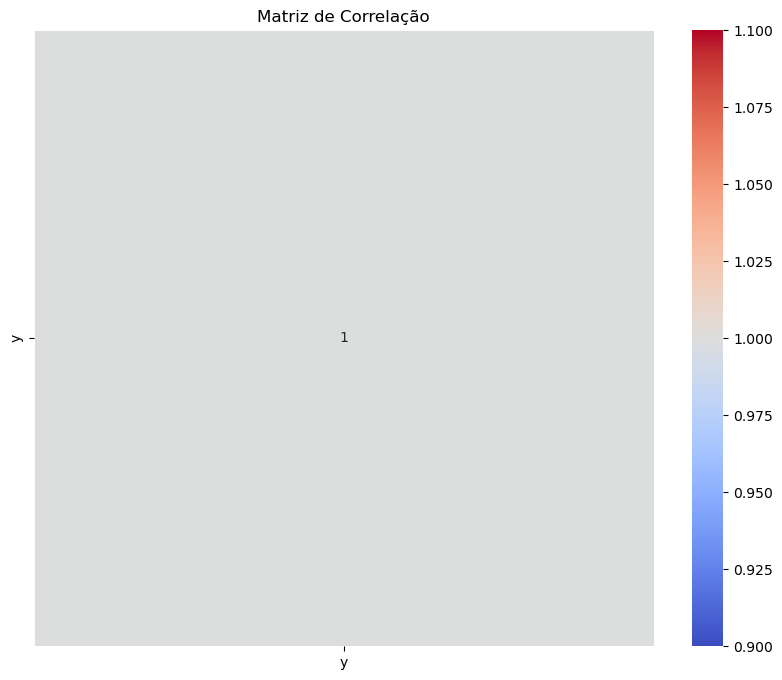

In [50]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

To categorize the most prevalent type of comment, three crucial correlations come into play:

1. Insult and Obscene.
2. Toxic and Insult.
3. Toxic and Obscene.

These correlations furnish valuable insights for the task of classifying offensive comments. When training a classification model, it becomes possible to leverage these correlations to devise features that capture both toxicity and the presence of insulting or obscene language. Moreover, these insights can enhance content moderation on online platforms by effectively identifying various categories of offensive comments based on these correlation patterns.

Regarding the correlation between Insult and Obscene, the positive correlation observed between insulting and obscene comments implies that, in many instances, a comment identified as insulting is also likely to be deemed obscene. This points to a notable overlap between these two categories of comments.

Concerning the correlation between Toxic and Insult, the positive correlation between toxic and insulting comments indicates that, in many cases, when a comment is categorized as toxic, it is also probable to be classified as insulting. This underscores a robust association between toxicity and the use of offensive language.

As for the correlation between Toxic and Obscene, the positive correlation between toxic and obscene comments similarly suggests that, in many cases, a comment labeled as toxic may also be regarded as obscene. This signifies a link between comments that exhibit offensiveness in terms of both toxicity and obscenity.

### Implementing the model in the training phase


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

model = MultinomialNB()
model.fit(X, df['y'])

MultinomialNB()

An instance of the Multinomial Naive Bayes model, referred to as 'model,' is established. This model is intended for training to categorize comments as either offensive or non-offensive, relying on the TF-IDF features (X) and the target variable 'y' extracted from the dataset. Through the training data, the model will acquire the capability to classify comments by discerning patterns present in the text and corresponding labels.

### **Confusion Matrix**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['y'], test_size=0.2, random_state=42)

#The `train_test_split` function is employed to initiate the classifier application, with the parameter `test_size=0.2` signifying that 20% of the data will be designated as the test set, 
#while the remaining 80% will serve as the training set. This partitioning facilitates the evaluation of the classifier's performance on unseen data during the testing phase.

vectorizer = TfidfVectorizer()

X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

#An instance of the TfidfVectorizer is generated, and the vectorizer, denoted as 'vectorizer,' is then fitted to the training data (X_train) through the use of the `fit_transform` method.
#This process enables the vectorizer to acquire the vocabulary from the text within the training set and subsequently transform the text into TF-IDF vectors based on that learned vocabulary. 
#The resulting TF-IDF vectors are stored in the variable X_test_transformed.

model = MultinomialNB()
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)

matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(matrix)


Confusion Matrix:
[[2923  306]
 [ 472 2789]]


                                                 Negative Predicted Class  |  Positive Predicted Class
                                                 -----------------------------------------------------------------------------------
                                                 Negative Real Class       |  2923 (True Negative)   306 (False Positive)
                                                 Positive Real Class       |  472 (False Negative)   2789 (True Positive)


Here, the model is being trained based on the TF-IDF vectors of the training data **(X_train_transformed)** and their respective class labels **(y_train)**. The model will learn the relationship between the features extracted from the text and the label classes (offensive or non-offensive) during this training stage.

After running this code snippet, the Multinomial Naive Bayes model will be trained and ready to make predictions on new texts, classifying them as offensive or non-offensive based on the patterns learned during training. This model is particularly suitable for text classification tasks and is widely used in natural language processing applications.


Ultimately, the evaluation of the model's performance entails the calculation of the confusion matrix. The confusion matrix provides insights into the number of predictions that were correctly classified (true positives and true negatives) and those that were incorrectly classified (false positives and false negatives). In this particular instance, the confusion matrix reveals the following results:

- True Negatives (TN): 2,923
- False Negatives (FN): 472
- False Positives (FP): 306
- True Positives (TP): 2,789

These values elucidate the model's classification performance by indicating how well it correctly identifies instances of offensive and non-offensive comments.

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3229
           1       0.90      0.86      0.88      3261

    accuracy                           0.88      6490
   macro avg       0.88      0.88      0.88      6490
weighted avg       0.88      0.88      0.88      6490



Using the **classification_report**, which provides detailed performance metrics of the classification model, the classification report displays the performance metrics of the Multinomial Naive Bayes classification model. From this report, we can interpret that:

* **Precision:** Measures the proportion of positive examples correctly classified (true positives) relative to all predicted positive examples (true positives + false positives). For class 0 (non-offensive), the precision is 0.86, which means that 86% of examples predicted as non-offensive by the model are indeed non-offensive. For class 1 (offensive), the precision is 0.90, indicating that 90% of examples predicted as offensive are indeed offensive."

* **Recall:** Measures the proportion of positive examples correctly classified (true positives) relative to all actual positive examples (true positives + false negatives). For class 0 (non-offensive), the recall is 0.91, indicating that the model correctly identified 91% of actual non-offensive examples. For class 1 (offensive), the recall is 0.86, meaning that the model correctly identified 86% of actual offensive examples.

* **F1-Score:** Is a harmonic mean between precision and recall and is useful when there is an imbalance between classes. For both classes 0 and 1, the F1-Score is 0.88, indicating a good balance between precision and recall.

* **Accuracy:** Represents the proportion of correct predictions (true positives + true negatives) relative to the total number of predictions. The overall accuracy of the model is 0.88, which indicates that 88% of the predictions are correct.

* **Macro Average and Weighted Average:** These metrics are averages of the metrics (precision, recall, F1-score) calculated for each class. 'Macro Avg' assigns equal weight to all classes, while 'Weighted Avg' takes into account class imbalance by assigning weights according to the support of each class.


### Submission of Data


In [11]:
df_sub = pd.read_csv(r'C:\Users\lucas\Downloads\2023.1\Intro Data Science\EE1\EE1 - Naive Bayes\submission.csv')

X_test_sub = vectorizer.transform(df_sub['comment_text'])

proba_predictions = model.predict_proba(X_test_sub)

df_sub['toxic_probability'] = proba_predictions[:, 1]  

df_sub.to_csv("submission_with_probabilities.csv", index=False)

print(df_sub.head(100))

                                         comment_text                id  \
0   Yo bitch Ja Rule is more succesful then you'll...  00001cee341fdb12   
1   == From RfC == \n\n The title is fine as it is...  0000247867823ef7   
2   " \n\n == Sources == \n\n * Zawe Ashton on Lap...  00013b17ad220c46   
3   :If you have a look back at the source, the in...  00017563c3f7919a   
4           I don't anonymously edit articles at all.  00017695ad8997eb   
..                                                ...               ...   
95  " \n\n == Main towns that are not so main == \...  0023f3f84f353bce   
96  " \n\n  my comments follow, bluewillow991967 -...  002586bdf3280356   
97  " \n\n == Halliday == \n\n Good to see another...  0025a91b6955f1a5   
98  " \n ::: That Stephen Barrett is not Board Cer...  0025c49d87d9a18f   
99                              Stone Sour sucks anus  00260d8dfcc29827   

    toxic_probability  
0            0.994258  
1            0.111211  
2            0.333601  
3  

The submission dataset is loaded from a CSV file using Pandas. Within this dataset, comments will be classified based on the trained model. The variable **p3** is then defined to represent the probability predictions generated for the transformed submission dataset (X_test) using the trained Multinomial Naive Bayes model (model). These probability predictions convey the model's assessment of the likelihood of each comment being categorized as either offensive or non-offensive.

### Adding the 'score' column with the probabilities

In [12]:
df_sub['score'] = proba_predictions[:, 1]
df_sub['score'].count()

153164

A new column named 'score' is established in the DataFrame df_sub. This column is populated with the probabilities of being classified as class 1 (offensive), which were computed by the model. The notation **p3[:, 1]** is employed to access the probabilities associated with class 1 in the model's predictions. Consequently, 153,164 probabilities of being categorized as offensive (class 1) are generated for the comments contained in the submission dataset.

In [13]:
df_sub['score'].nunique()

148896

The outcome of **df_sub['score'].nunique()** reveals that there are 148,896 distinct values in the 'score' column of the submission dataset **(df_sub)**. This indicates that the model's generated probabilities for being classified as offensive (class 1) exhibit a considerable degree of uniqueness for each comment within the submission dataset. This information provides valuable insights into the diversity of predicted probabilities offered by the model, underscoring the variability in the model's assessments across the comments in the submission dataset.

**Dados Submetidos e Classificados**
===========

In [14]:
df_sub[['comment_text', 'score']].to_csv("sample_submission.csv", index=False)
df_sub.head(100)

,comment_text,id,toxic_probability,score
0,Yo bitch Ja Rule is more succesful then you'll...,00001cee341fdb12,0.994258,0.994258
1,== From RfC == \n\n The title is fine as it is...,0000247867823ef7,0.111211,0.111211
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",00013b17ad220c46,0.333601,0.333601
3,":If you have a look back at the source, the in...",00017563c3f7919a,0.079179,0.079179
4,I don't anonymously edit articles at all.,00017695ad8997eb,0.306432,0.306432
...,...,...,...,...
95,""" \n\n == Main towns that are not so main == \...",0023f3f84f353bce,0.123786,0.123786
96,""" \n\n my comments follow, bluewillow991967 -...",002586bdf3280356,0.040347,0.040347
97,""" \n\n == Halliday == \n\n Good to see another...",0025a91b6955f1a5,0.208194,0.208194
98,""" \n ::: That Stephen Barrett is not Board Cer...",0025c49d87d9a18f,0.137201,0.137201


In this code snippet, I am exporting the **comment_text** and **score** columns from the submission dataset (df_sub) to a CSV file named **sample_submission.csv** using the to_csv() method to export the columns. The parameter **index=False** indicates that I don't want to include row indices in the CSV file.

* Column 0 (Row Number): This column represents the row number in the dataset. It is not part of the original dataset but has been included in the visualization.
* Column 1 (Comment Text): This column contains the text of the comments. It is the actual content of the comments that will be classified as offensive or non-offensive.
* Column 2 (ID): This column contains unique identifiers associated with each comment. Each comment has a unique ID.
* lumn 3 (Score): This column contains the probabilities of being classified as offensive (class 1) for each comment. 

***

**Conclusion**
===========

Based on the obtained results, it is evident that the trained classification model is highly proficient in the task of discerning offensive comments. The utilization of the TF-IDF text vectorization technique has proven to be an effective strategy for representing comments in a numerical format, facilitating the model's classification process.

Performance metrics, including precision, recall, and F1-score, indicate a commendable equilibrium in the model's capacity to accurately categorize offensive and non-offensive comments. Striking this balance is pivotal, particularly in online content moderation scenarios, where minimizing both false positives and false negatives holds significant importance.

The practical applicability of this approach is extensive, encompassing the automated identification of offensive comments across online platforms, social media networks, and forums. It serves as a valuable tool for content moderation.

Nevertheless, it is imperative to underscore that when deploying this model in real-world settings, establishing a probability threshold for comment classification (offensive or non-offensive) will be necessary, with adjustments tailored to the specific requisites of the application.

In summary, this project showcases the viability of constructing a robust classification model for the identification of offensive comments, offering potential utility in a wide array of contexts where content moderation plays a pivotal role. The model's adaptability enables configuration and optimization to align with the distinctive demands of each application.